## Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

## Loading the Dataset

In [ ]:
data = pd.read_csv('Student.csv')

In [ ]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


## Label Encoding of Categorical Columns

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [ ]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,5,4,2,1,2,5,4,10,11,10
645,1,0,18,1,1,1,3,1,4,3,...,4,3,4,1,1,1,4,15,15,16
646,1,0,18,1,0,1,1,1,2,2,...,1,1,1,1,1,5,6,11,12,9
647,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,6,10,10,10


## Splitting dataset into Train and Test

In [ ]:
X = data.drop('G3', axis=1)
y = data['G3']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Type Conversion

In [ ]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

## Creating a Neural Network Model

In [ ]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))

## Compiling the Model

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

## Training the Model

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
13/13 [==============================] - 1s 18ms/step - loss: 75.3081 - val_loss: 20.2572
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 13.4972 - val_loss: 7.5886
Epoch 3/50
13/13 [==============================] - 0s 6ms/step - loss: 10.4102 - val_loss: 4.2904
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 6.9205 - val_loss: 3.8541
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 5.3703 - val_loss: 2.3201
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 3.6508 - val_loss: 1.4741
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 2.5715 - val_loss: 1.2940
Epoch 8/50
13/13 [==============================] - 0s 4ms/step - loss: 2.2299 - val_loss: 1.2596
Epoch 9/50
13/13 [==============================] - 0s 4ms/step - loss: 2.1884 - val_loss: 1.2387
Epoch 10/50
13/13 [==============================] - 0s 6ms/step - loss: 2.0458 - val_loss: 1.2404
Epoch 11/50
13

## Evaluating the Model

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

5/5 [==============================] - 1s 4ms/step
Mean Squared Error: 1.7405353


## Visualizing Training Progress:

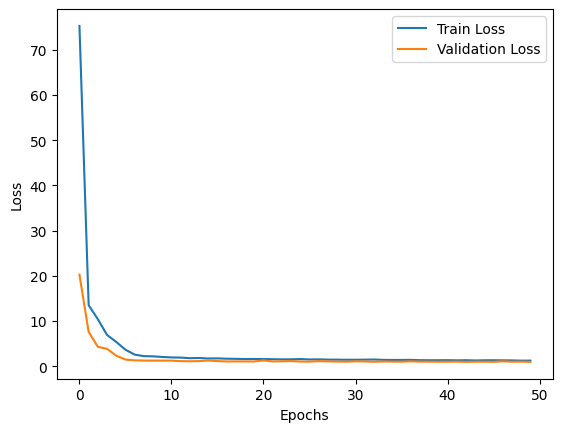

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()